## Kalman filter

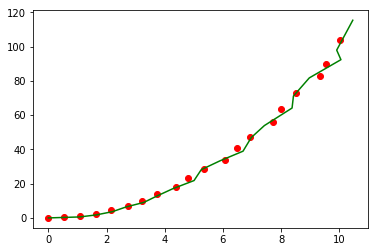

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def kalman_xy(x, P, measurement, R,
              motion = np.matrix('0. 0. 0. 0.').T,
              Q = np.matrix(np.eye(4))):
    """
    Parameters:    
    x: initial state 4-tuple of location and velocity: (x0, x1, x0_dot, x1_dot)
    P: initial uncertainty convariance matrix
    measurement: observed position
    R: measurement noise 
    motion: external motion added to state vector x
    Q: motion noise (same shape as P)
    """
    return kalman(x, P, measurement, R, motion, Q,
                  F = np.matrix('''
                      1. 0. 1. 0.;
                      0. 1. 0. 1.;
                      0. 0. 1. 0.;
                      0. 0. 0. 1.
                      '''),
                  H = np.matrix('''
                      1. 0. 0. 0.;
                      0. 1. 0. 0.'''))

def kalman(x, P, measurement, R, motion, Q, F, H):
    '''
    Parameters:
    x: initial state
    P: initial uncertainty convariance matrix
    measurement: observed position (same shape as H*x)
    R: measurement noise (same shape as H)
    motion: external motion added to state vector x
    Q: motion noise (same shape as P)
    F: next state function: x_prime = F*x
    H: measurement function: position = H*x

    Return: the updated and predicted new values for (x, P)

    See also http://en.wikipedia.org/wiki/Kalman_filter

    This version of kalman can be applied to many different situations by
    appropriately defining F and H 
    '''
    # UPDATE x, P based on measurement m    
    # distance between measured and current position-belief
    y = np.matrix(measurement).T - H * x
    S = H * P * H.T + R  # residual convariance
    K = P * H.T * S.I    # Kalman gain
    x = x + K*y
    I = np.matrix(np.eye(F.shape[0])) # identity matrix
    P = (I - K*H)*P

    # PREDICT x, P based on motion
    x = F*x + motion
    P = F*P*F.T + Q

    return x, P

def demo_kalman_xy():
    x = np.matrix('0. 0. 0. 0.').T 
    P = np.matrix(np.eye(4))*1000 # initial uncertainty

    N = 20
    true_x = np.linspace(0.0, 10.0, N)
    true_y = true_x**2
    observed_x = true_x + 0.05*np.random.random(N)*true_x
    observed_y = true_y + 0.05*np.random.random(N)*true_y
    plt.plot(observed_x, observed_y, 'ro')
    result = []
    R = 0.01**2
    for meas in zip(observed_x, observed_y):
        x, P = kalman_xy(x, P, meas, R)
        result.append((x[:2]).tolist())
    kalman_x, kalman_y = zip(*result)
    plt.plot(kalman_x, kalman_y, 'g-')
    plt.show()

demo_kalman_xy()

## Random x and y movements

In [30]:
num_steps = 100

In [31]:
xs = np.zeros(num_steps)
ys = np.zeros(num_steps)

In [32]:
for i in range(1,num_steps):
    xs[i] = xs[i-1]+np.random.normal(0,0.8)
    ys[i] = ys[i-1]+np.random.normal(0.3,0.8)

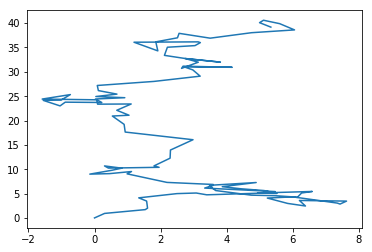

In [33]:
plt.plot(xs,ys)
plt.show()

In [41]:
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise (ValueError, "smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise( ValueError, "Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise (ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y


In [47]:
xs_smoothed = smooth(xs,window_len=5)
ys_smoothed = smooth(ys,window_len=5)

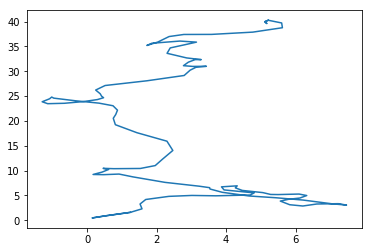

In [48]:
plt.plot(xs_smoothed,ys_smoothed)
plt.show()

In [53]:
v_x = np.gradient(xs_smoothed)
v_y = np.gradient(ys_smoothed)

In [56]:
acc_x = np.gradient(v_x)
acc_y = np.gradient(v_y)

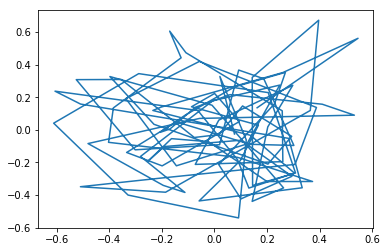

In [57]:
plt.plot(acc_x,acc_y)
plt.show()

In [ ]:
for i in range(1,num_steps):
    